# Introdução à Estatística (Case Prático)
***

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" height="40px" style="position: absolute; top: 12px; right: 20px;" />

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

## Variáveis utilizadas

### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade

Idade do morador na data de referência em anos.

### Altura (elaboração própria)

Altura do morador em metros.

### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando as bibliotecas e lendo o dataset

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

In [ ]:
df = pd.read_csv("PNAD2015.csv")

In [ ]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1. Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [ ]:
df["Anos de Estudo"].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13])

In [ ]:
df['Idade'].unique()

array([23, 35, 46, 47, 34, 57, 60, 50, 26, 49, 52, 38, 45, 43, 53, 62, 69,
       41, 25, 33, 44, 65, 32, 30, 64, 31, 63, 40, 28, 37, 39, 36, 73, 56,
       27, 42, 51, 29, 24, 55, 67, 66, 61, 54, 48, 80, 79, 71, 59, 19, 22,
       77, 58, 17, 72, 70, 18, 21, 20, 68, 74, 76, 75, 84, 85, 78, 15, 82,
       95, 13, 83, 81, 87, 88, 16, 91, 92, 97, 89, 90, 86, 94, 14, 99])

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [ ]:
df['UF'].nunique()

27

In [ ]:
df['Sexo'].nunique()

2

In [ ]:
df['Cor'].nunique()

5

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [ ]:
df['Renda'].nunique()

1606

In [ ]:
df['Altura'].nunique()

76831

## <font color=green>2. Distribuição de frequências</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável sexo

In [ ]:
fi_sexo = df['Sexo'].value_counts()

In [ ]:
freq_sexo = df['Sexo'].value_counts(normalize= True)*100

In [ ]:
df_frequencia = pd.DataFrame({"Frequência Absoluta": fi_sexo, "Frequência Percentual": freq_sexo})

In [ ]:
df_frequencia.rename(index = {0: 'Masculino',1: 'Feminino'}, inplace = True)

In [ ]:
df_frequencia.rename_axis('Sexo')


,Frequência Absoluta,Frequência Percentual
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


**Obtenha a tabela e o gráfico de distribuição de frequências para a variável Sexo cruzada com os dados de Cor**

In [ ]:
pd.crosstab(index= df['Sexo'],columns= df['Cor'])


Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [ ]:
cor_sexo= pd.crosstab(index= df['Sexo'],columns= df['Cor'])

In [ ]:
cor_sexo.rename(index = { 0: 'Masculino', 1: 'Feminino'},inplace =True)

In [ ]:
cor_sexo.rename(columns = { 0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda'},inplace =True)

In [ ]:
cor_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


Text(0, 0.5, 'Quantidade por cor ')

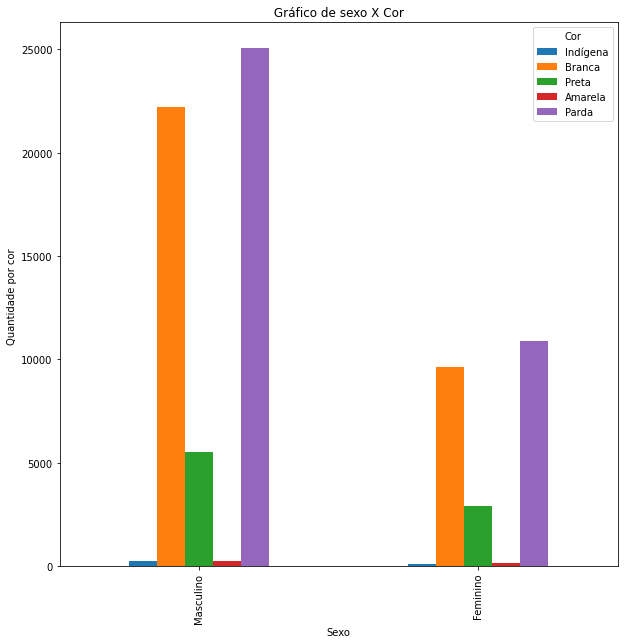

In [ ]:
cor_sexo.plot(kind = 'bar',figsize=(10,10))
plt.title(" Gráfico de sexo X Cor ")
plt.xlabel("Sexo")
plt.ylabel("Quantidade por cor ")



## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso, <b>R$ 788,00</b> (considerando o ano de 2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


#### 1. Criar um dataframe que contenha essas classes personalizadas, utilizando o `pd.cut`.

In [ ]:
renda_classes= pd.cut(
    df.Renda, 
    bins=[df.Renda.min(),1576,3152,7880,15760,df.Renda.max()],
    labels=['E','D','C','B','A'],
    include_lowest=True
    )

In [ ]:
fi = renda_classes.value_counts() #frequencia absoluta

In [ ]:
fr= renda_classes.value_counts(normalize=True)*100

#### 2. Criar a tabela de distribuição de frequências do dataframe obtido acima.

In [ ]:
classes_personalizadas = pd.DataFrame({"Frequência Absoluta": fi,"Frequência percentual":fr})
classes_personalizadas.rename_axis('Intervalo')

,Frequência Absoluta,Frequência percentual
Intervalo,,
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


[Text(0, 0.5, ' Percentual Renda em reais'),
 Text(0.5, 0, 'Categorias das Rendas'),
 Text(0.5, 1.0, 'Frequência percentual - categorias de Rendas')]

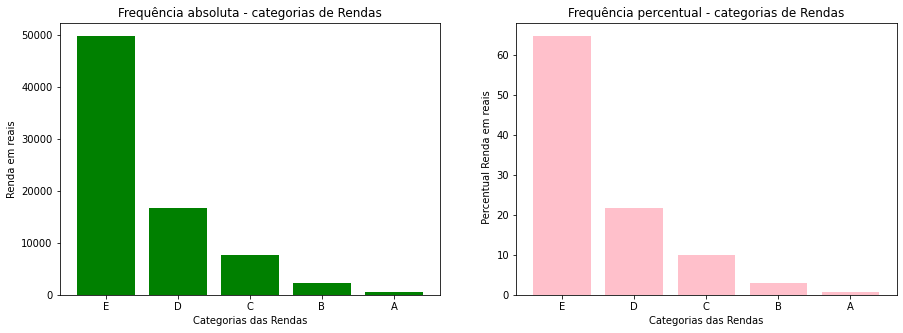

In [ ]:
fig,(axis1,axis2) = plt.subplots(1,2, figsize=(15,5))

axis1.bar(fi.index,fi.values, color='green')
axis1.set(title ='Frequência absoluta - categorias de Rendas',xlabel ='Categorias das Rendas', ylabel='Renda em reais')

axis2.bar(fr.index,fr.values, color= 'pink')
axis2.set(title ='Frequência percentual - categorias de Rendas',xlabel ='Categorias das Rendas', ylabel=' Percentual Renda em reais')




## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

Obtenha a tabela e o gráfico de distribuições de frequências da variável de renda, mas, dessa vez, utilizando a Regra de Sturges para definir as classes de amplitude fixa.

#### 1. Definindo o número de classes e criando o dataframe com as classes

#### Regra de Sturges

$$k = 1 + \frac{10}{3}\log_{10}n$$

In [ ]:
# n = tamanho da amostra 
n= df.shape[0]

In [ ]:
# k = quantidade de classes 
k = 1 + (10/3)*np.log10(n)
k= int(k)
print(k)

17


#### 2. Criando a tabela e o gráfico de distribução de frequências

In [ ]:
pd.cut(df['Renda'], bins= k , include_lowest= False)

0        (-200.0, 11764.706]
1        (-200.0, 11764.706]
2        (-200.0, 11764.706]
3        (-200.0, 11764.706]
4        (-200.0, 11764.706]
                ...         
76835    (-200.0, 11764.706]
76836    (-200.0, 11764.706]
76837    (-200.0, 11764.706]
76838    (-200.0, 11764.706]
76839    (-200.0, 11764.706]
Name: Renda, Length: 76840, dtype: category
Categories (17, interval[float64]): [(-200.0, 11764.706] < (11764.706, 23529.412] <
                                     (23529.412, 35294.118] < (35294.118, 47058.824] < ... <
                                     (152941.176, 164705.882] < (164705.882, 176470.588] <
                                     (176470.588, 188235.294] < (188235.294, 200000.0]]

In [ ]:
renda_classes_qcut = pd.qcut(df['Renda'], q=k)
renda_classes_qcut

0            (788.0, 800.0]
1        (1000.0, 1162.529]
2            (800.0, 900.0]
3          (2800.0, 3500.0]
4           (-0.001, 160.0]
                ...        
76835        (800.0, 900.0]
76836      (1200.0, 1500.0]
76837      (1200.0, 1500.0]
76838      (1200.0, 1500.0]
76839        (800.0, 900.0]
Name: Renda, Length: 76840, dtype: category
Categories (17, interval[float64]): [(-0.001, 160.0] < (160.0, 400.0] < (400.0, 650.0] <
                                     (650.0, 788.0] ... (2100.0, 2800.0] < (2800.0, 3500.0] <
                                     (3500.0, 5500.0] < (5500.0, 200000.0]]

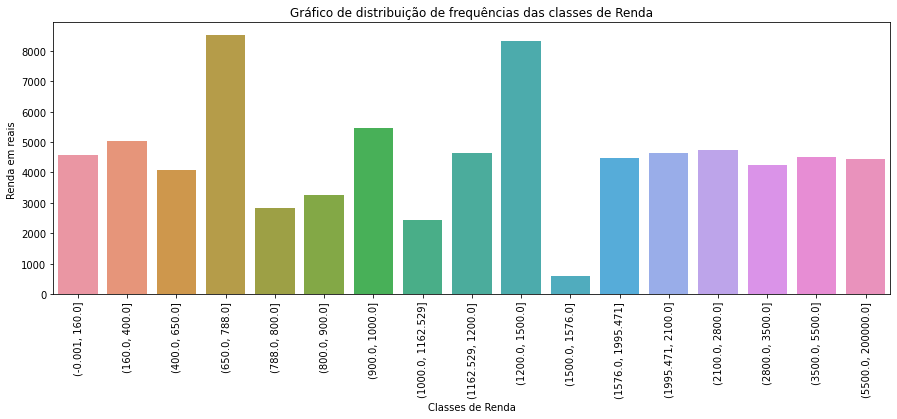

In [ ]:
plt.figure(figsize= (15,5))
sns.countplot(x=renda_classes_qcut)
plt.xticks(rotation =90)
plt.title("Gráfico de distribuição de frequências das classes de Renda")
plt.xlabel('Classes de Renda')
plt.ylabel('Renda em reais ')
plt.show()

## 3. Medidas de Tendência Central</font>
***

#### 3.1 Média aritmética

Calcule a média aritmética das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [ ]:
df["Anos de Estudo"].mean()

9.469664237376367

In [ ]:
df["Idade"].median()

43.0

In [ ]:
df["Renda"].mean()

2000.3831988547631

In [ ]:
df["Altura"].mean()

1.6995124540575814

#### 3.2 Mediana

Calcule a mediana das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [ ]:
df["Anos de Estudo"].median()

11.0

In [ ]:
df["Idade"].median()

43.0

In [ ]:
df["Renda"].median()

1200.0

In [ ]:
df["Altura"].median()

1.6993247325

#### 3.3. Moda

Calcule a moda daquelas variáveis para as quais você imagina que faz sentido obter essa informação (com base no que vimos na aula).

In [ ]:
df["Anos de Estudo"].mode()

0    12
dtype: int64

In [ ]:
df["Idade"].mode()

0    40
dtype: int64

In [ ]:
df["Renda"].mode()

0    788
dtype: int64

In [ ]:
df["Altura"].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

Como fizemos durante a aula, avalie a relação entre a média, mediana e moda de algumas variáveis do seu conjunto de dados.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avalie a variável `Renda`

In [ ]:
df["Renda"].mode()

0    788
dtype: int64

In [ ]:
df["Renda"].median()

1200.0

In [ ]:
df["Renda"].mean()

2000.3831988547631

In [ ]:
#Assimetria à direita

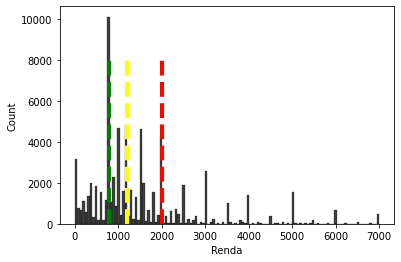

In [ ]:
sns.histplot(df.query('Renda <= 7000').Renda, color = 'black')
plt.vlines(df.Renda.mean(),0, 8000, linewidth=4, linestyle='--', color='red', label='Média da Renda')
plt.vlines(df.Renda.mode(),0, 8000, linewidth=4, linestyle='--', color='green', label='Moda da Renda')
plt.vlines(df.Renda.median(),0, 8000, linewidth=4, linestyle='--', color='yellow', label='Mediana da Renda')


***

### Avalie a variável `Altura`

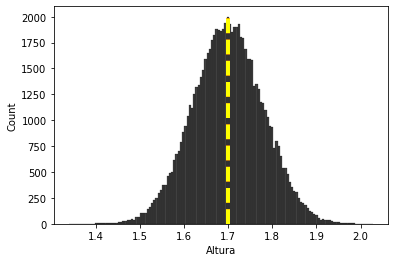

In [ ]:
sns.histplot(x=df['Altura'], color='black')
plt.vlines(df.Altura.mean(),0, 2000, linewidth=4, linestyle='--', color='red', label='Média da Altura')
#plt.vlines(df.Altura.mode(),0, 2000, linewidth=4, linestyle='--', color='black', label='Moda da Altura')
plt.vlines(df.Altura.median(),0, 2000, linewidth=4, linestyle='--', color='yellow', label='Mediana da Altura')

#SIMÉTRICO

In [ ]:
df.Altura.mean()


1.6995124540575814

In [ ]:
df.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [ ]:
df.Altura.median()

1.6993247325

***

### Avalie a variável `Anos de estudo`

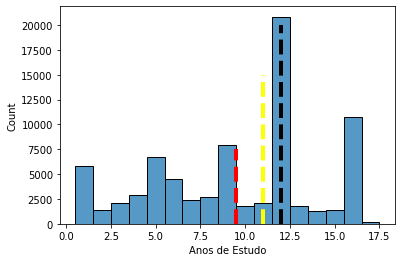

In [ ]:
sns.histplot(x=df['Anos de Estudo'], discrete= True)
plt.vlines(df['Anos de Estudo'].mean(),0, 7500, linewidth=4, linestyle='--', color='red', label='Média dos Anos de estudo')
plt.vlines(df['Anos de Estudo'].mode(),0, 20000, linewidth=4, linestyle='--', color='black', label='Moda dos Anos de estudo')
plt.vlines(df['Anos de Estudo'].median(),0, 15000, linewidth=4, linestyle='--', color='yellow', label='Mediana dos Anos de estudo')

In [ ]:
# ASSIMETRIA À ESQUERDA 

## 4. Medidas Separatrizes
***

### 4.1 Quartis, decis e percentis

Calcule os quartis, decis e percentis para a variável `Renda`.

In [ ]:
# Quartis:

df['Renda'].quantile([0.25,0.50,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [ ]:
# Decis:

df['Renda'].quantile(q=[ i / 10 for i in range(1,10) ])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [ ]:
# Percentis:

df['Renda'].quantile(q=[ i / 100 for i in range(1,100) ])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

In [ ]:
# Percentual de pessoas que recebem até um salário mínimo (R$ 788,00 ). 
#Pelo Dercil, já podemos perceber que esse valor está entre 20% e 30%. 

#Usaremos o percentil para visualizar a porcentagem exata:

df['Renda'].quantile(q=[ i / 100 for i in range(1,100) ]).head(30)

# 28% (OU 0,28 ) : ÚLTIMO VALOR QUE A RENDA É ATÉ R$ 788,00

0.01      0.0
0.02      0.0
0.03      0.0
0.04     50.0
0.05    100.0
0.06    180.0
0.07    200.0
0.08    280.0
0.09    300.0
0.10    350.0
0.11    400.0
0.12    400.0
0.13    480.0
0.14    500.0
0.15    500.0
0.16    600.0
0.17    600.0
0.18    700.0
0.19    700.0
0.20    788.0
0.21    788.0
0.22    788.0
0.23    788.0
0.24    788.0
0.25    788.0
0.26    788.0
0.27    788.0
0.28    788.0
0.29    789.0
0.30    800.0
Name: Renda, dtype: float64

### 4.2 Boxplot

Crie o boxplot para as variáveis `Renda`, `Altura`.

In [ ]:
# Boxplot da Renda: 
#px.box(data_frame= df, x='Renda', height=400, points= 'all')

In [ ]:
#Boxplot da Altura:
#px.box(data_frame= df, x='Altura', height=400, points= 'all')

# <font color=green>5. Medidas de Dispersão</font>
***

Obtenha a variância e o desvio padrão das variáveis quantitativas do conjunto de dados. Em seguida, utilize o `seaborn` para plotar um gráfico de barras que exiba a média dessas variáveis quantitativas, em função da Unidade Federativa. Com o `seaborn` você também irá conseguir visualizar o desvio padrão da média para cada barra.

In [ ]:
#Variância da idade:
df['Idade'].var()

155.76496363582208

In [ ]:
#Desvio padrão da idade:
df['Idade'].std()

12.480583465360187

In [ ]:
#Variância dos Anos de Estudo:
df['Anos de Estudo'].var()

20.61095651086286

In [ ]:
#Desvio padrão dos Anos de Estudo:
df['Anos de Estudo'].std()

4.539929130599162

In [ ]:
#Variância da Renda:
df['Renda'].var()

11044906.00622118

In [ ]:
#Desvio padrão da renda:
df['Renda'].std()

3323.3877303470294

In [ ]:
#Variância da Altura:
df['Altura'].var()

0.006354868656686826

In [ ]:
#Desvio padrão da altura:
df['Altura'].std()

0.07971743006825312

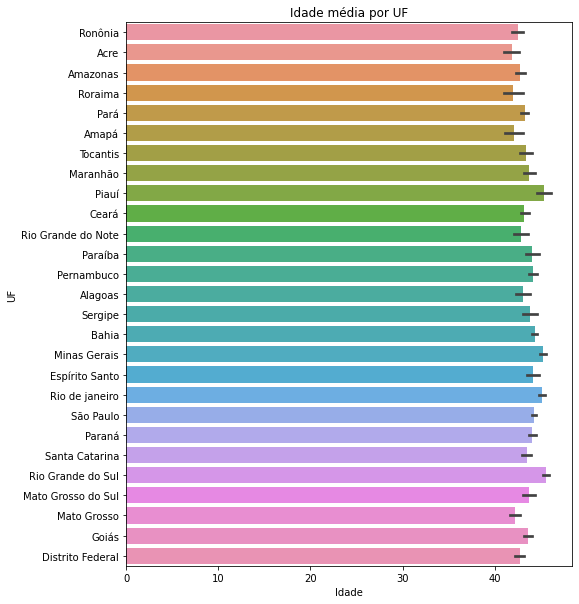

In [ ]:
#Gráfico de barras que exiba a média dessas variáveis quantitativas, em função da Unidade Federativa:

uf=  [
      'Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantis','Maranhão','Piauí',
      'Ceará','Rio Grande do Note', 'Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais',
      'Espírito Santo','Rio de janeiro', 'São Paulo','Paraná', 'Santa Catarina','Rio Grande do Sul',
      'Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal',
     ]
plt.figure(figsize= (8,10))
sns.barplot(data=df, x='Idade', y='UF',orient= 'h').set_yticklabels(uf)
plt.title('Idade média por UF')
plt.show()
